# Self Study: The Kaldor Model

In this notebook, we'll explore the Kaldor business cycle. The model demonstrates how nonlinear interactions between investment and savings can generate persistent economic cycles and hysteresis effects.

## The Model

The Kaldor model describes an economy using two state variables:

1. **Output ($ Y $)**: Total production in the economy
2. **Capital Stock ($ K $)**: Accumulated productive capacity (Capital)

The dynamics are governed by:

$$
\frac{dY}{dt} = \alpha \left( I(Y, K) - S(Y, K) \right)
$$
$$
\frac{dK}{dt} = I(Y, K) - \delta K
$$


### Functional Forms

**Investment:** Linear in Y, decreasing in K
$$
I(Y, K) = i \cdot Y - K
$$
- Higher output → more profitable investment opportunities
- Higher capital stock → fewer new opportunities (diminishing returns)

**Savings:** Cubic in Y (nonlinear!)
$$
S(Y, K) = Y^3 + s \cdot Y + K
$$
- Low income: negative savings (dissaving)
- Medium income: moderate saving rate
- High income: rapid increase in savings (cubic term dominates)

In [1]:
# import libarries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.integrate import odeint

## Section 1: Understanding Investment and Savings Functions

### Task 1.1: Define the model functions

Implement the four core functions of the Kaldor model:
- `savings(Y, K, s)`: Cubic savings function
- `investment(Y, K, i)`: Linear investment function  
- `dYdt(I, S, alpha)`: Income dynamics
- `dKdt(I, K, delta)`: Capital dynamics

In [2]:
def savings(Y, K, s):
    S = Y*Y*Y + s*Y + K
    return S


def investment(Y, K, i):
    I = i * Y - K
    return I


def dYdt(I, S, alpha):
    dYdt = alpha * (I - S)
    return dYdt

def dKdt(I, K, delta): 
    dKdt = I - delta * K
    return dKdt 
    

### Task 1.2: Visualize Investment and Savings Curves

Create an interactive plot showing $I(Y)$ and $S(Y)$ for different parameter values.
As wells as $\dot Y$ vs $Y$.

Show that varrying $K$ changes the number of equilibria (either multiple plots or an interactive plot).

In [3]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt


def plot_I_K(K, s, alpha, delta, i):
    
    Y = np.linspace(-3, 3, 400)
    S = savings(Y, K, s)
    I = investment(Y, K, i)
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(Y, S, label='Savings S(Y,K)', color='blue')
    plt.plot(Y, I, label='Investment I(Y,K)', color='red')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('Output (Y)')
    plt.ylabel('Capital (K)')
    plt.title('Phase Diagram of Kaldor Model')
    plt.grid()
    plt.show()

interact(plot_I_K, K=(0, 2, 0.01), s=(0, 2, 0.01), i=(0, 2, 0.01), alpha=(0.1, 2, 0.01), delta=(0.1, 2, 0.01))

interactive(children=(FloatSlider(value=1.0, description='K', max=2.0, step=0.01), FloatSlider(value=1.0, desc…

<function __main__.plot_I_K(K, s, alpha, delta, i)>

In [4]:
def plot_dYdt(K, s, alpha, delta, i):
    Y_values = np.linspace(-3, 3, 400)
    dYdt_values = []
    for Y in Y_values:
        S = savings(Y, K, s)
        I = investment(Y, K, i)
        dYdt_values.append(dYdt(I, S, alpha))
    
    plt.figure(figsize=(8, 6))
    plt.plot(Y_values, dYdt_values, label='dY/dt', color='green')
    plt.xlabel('Output (Y)')
    plt.ylabel('dY/dt')
    plt.title('Dynamics of Output in Kaldor Model')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.xlim(-3, 3)


interact(plot_dYdt, K=(0, 2, 0.01), s=(0, 2, 0.01), i=(0, 2, 0.01), alpha=(0.1, 2, 0.01), delta=(0.1, 2, 0.01))

interactive(children=(FloatSlider(value=1.0, description='K', max=2.0, step=0.01), FloatSlider(value=1.0, desc…

<function __main__.plot_dYdt(K, s, alpha, delta, i)>

## Section 2: Biffurcation

### Task 2.1: Bifurcation Diagram (K vs Y*)

Find the analytical solution to for the points wher $Y^*=0$ as a function of $K$.

In [5]:
import sympy as sympy
from sympy import Eq, solve
from sympy import symbols
from scipy.integrate import odeint

Y, S, I, K = sympy.symbols('Y S I K')
alpha = sympy.symbols('alpha')
delta = sympy.symbols('delta')
i = sympy.symbols('i')
s = sympy.symbols('s')

S = -  Y*Y*Y + s * Y + K
I = i * Y - K

dYdt = alpha * (I - S)

solution = solve(Eq(dYdt, 0), Y)
solution = solution[0]
solution

-(-1/2 - sqrt(3)*I/2)*(-27*K + sqrt(2916*K**2 - 4*(-3*i + 3*s)**3)/2)**(1/3)/3 - (-3*i + 3*s)/(3*(-1/2 - sqrt(3)*I/2)*(-27*K + sqrt(2916*K**2 - 4*(-3*i + 3*s)**3)/2)**(1/3))

### Task 2.2: Plot the Bifurcation Diagram ($Y^*$ as function of $K$)

0.793683989178338 - 0.0629973650492339/(-1/2 - sqrt(3)*I/2) + 0.793683989178338*sqrt(3)*I
0.79097480744888 - 0.063213138432644/(-1/2 - sqrt(3)*I/2) + 0.79097480744888*sqrt(3)*I
0.788246935355847 - 0.0634318990119866/(-1/2 - sqrt(3)*I/2) + 0.788246935355847*sqrt(3)*I
0.785500047103249 - 0.0636537199257836/(-1/2 - sqrt(3)*I/2) + 0.785500047103249*sqrt(3)*I
0.782733807710665 - 0.0638786768981395/(-1/2 - sqrt(3)*I/2) + 0.782733807710665*sqrt(3)*I
0.779947872653348 - 0.0641068483588553/(-1/2 - sqrt(3)*I/2) + 0.779947872653348*sqrt(3)*I
0.777141887484187 - 0.064338315570485/(-1/2 - sqrt(3)*I/2) + 0.777141887484187*sqrt(3)*I
0.7743154874364 - 0.0645731627628161/(-1/2 - sqrt(3)*I/2) + 0.7743154874364*sqrt(3)*I
0.771468297005751 - 0.0648114772752966/(-1/2 - sqrt(3)*I/2) + 0.771468297005751*sqrt(3)*I
0.768599929510993 - 0.0650533497079704/(-1/2 - sqrt(3)*I/2) + 0.768599929510993*sqrt(3)*I
0.765709986631146 - 0.0652988740815336/(-1/2 - sqrt(3)*I/2) + 0.765709986631146*sqrt(3)*I
0.762798057918112 

TypeError: Cannot convert complex to float

0.793683989178338 - 0.0629973650492339/(-1/2 - sqrt(3)*I/2) + 0.793683989178338*sqrt(3)*I
0.79097480744888 - 0.063213138432644/(-1/2 - sqrt(3)*I/2) + 0.79097480744888*sqrt(3)*I
0.788246935355847 - 0.0634318990119866/(-1/2 - sqrt(3)*I/2) + 0.788246935355847*sqrt(3)*I
0.785500047103249 - 0.0636537199257836/(-1/2 - sqrt(3)*I/2) + 0.785500047103249*sqrt(3)*I
0.782733807710665 - 0.0638786768981395/(-1/2 - sqrt(3)*I/2) + 0.782733807710665*sqrt(3)*I
0.779947872653348 - 0.0641068483588553/(-1/2 - sqrt(3)*I/2) + 0.779947872653348*sqrt(3)*I
0.777141887484187 - 0.064338315570485/(-1/2 - sqrt(3)*I/2) + 0.777141887484187*sqrt(3)*I
0.7743154874364 - 0.0645731627628161/(-1/2 - sqrt(3)*I/2) + 0.7743154874364*sqrt(3)*I
0.771468297005751 - 0.0648114772752966/(-1/2 - sqrt(3)*I/2) + 0.771468297005751*sqrt(3)*I
0.768599929510993 - 0.0650533497079704/(-1/2 - sqrt(3)*I/2) + 0.768599929510993*sqrt(3)*I
0.765709986631146 - 0.0652988740815336/(-1/2 - sqrt(3)*I/2) + 0.765709986631146*sqrt(3)*I
0.762798057918112 

TypeError: Cannot convert complex to float

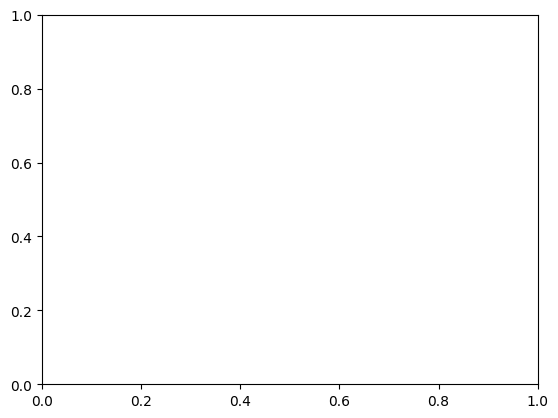

In [7]:
Y_ss_values = []
i_value = 0.2
K_values = np.linspace(-2, -1, 50)
s_value = 0.5

for K_val in K_values:

    Y_ss = solution.subs({K: K_val, i: i_value, s: s_value})
    print(Y_ss)
    Y_ss_values.append((Y_ss))

plt.plot(K_values, Y_ss_values)
plt.xlabel('Capital (K)')
plt.ylabel('Steady-State Output (Y_ss)')
plt.title('Steady-State Output vs Capital in Kaldor Model')
plt.grid()

## Section 3: Full Model

### Task 3.1: Define the coupled system

In [ ]:
# Define the Kaldor model system of equations
# YOUR CODE HERE

dKdt = I - delta * K
dYdt = alpha * (I - S)

### Task 3.2: Plot the System

- Show the evolution for various parameters as $K$ and $Y$ as function of $t$, the evolution
- Plot the Streamplot and one trajectory in the $K$—$Y$ space.

In [ ]:
# YOUR CODE HERE